In [82]:
from catboost import CatBoostClassifier
import pandas as pd
import catboost
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import shap

In [54]:
tf_idf_data = pd.read_csv('processed.csv', index_col=0)

In [69]:
model = CatBoostClassifier().load_model('small_model.cbm')

In [70]:
features = tf_idf_data.drop(columns=['fraudulent'])
target = tf_idf_data['fraudulent']

In [71]:
features = features[list(features.columns[:18])]

## Lets start visualization

In [72]:
explainer = shap.Explainer(model)
shap_values = explainer(features)

#### Examples for two items

Visualization for class 0 example


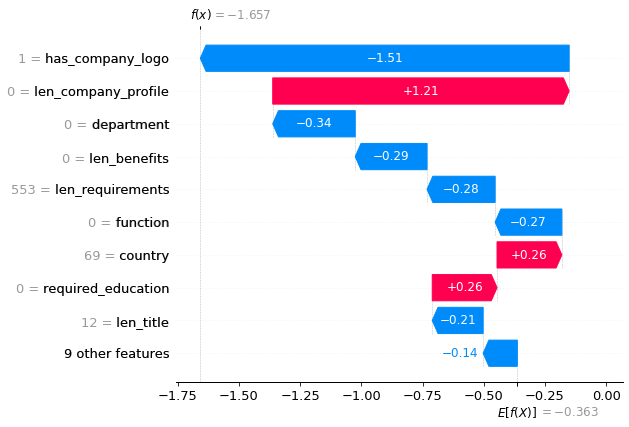

In [73]:
# visualize the first prediction's explanation
print("Visualization for class {} example".format(target.iloc[100]))
shap.plots.waterfall(shap_values[100])

Visualization for class 1 example


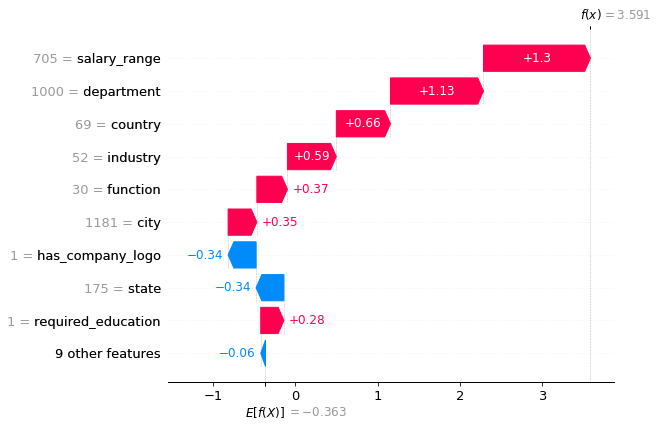

In [74]:
print("Visualization for class {} example".format(target.iloc[98]))
shap.plots.waterfall(shap_values[98])

## Feature importance

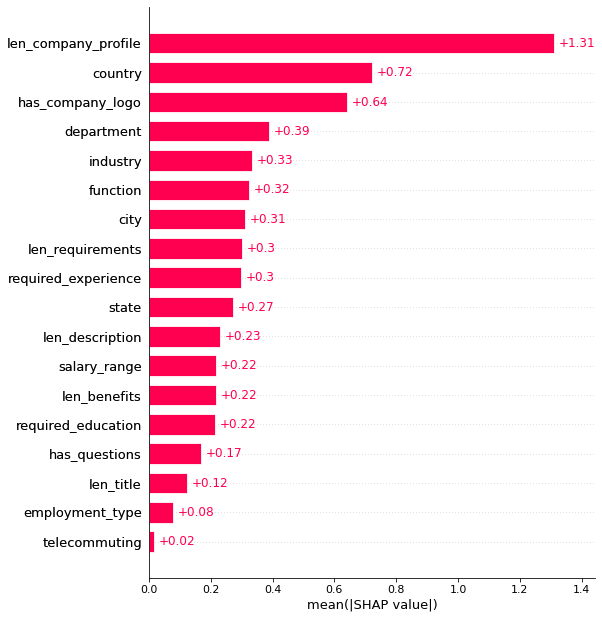

In [87]:
shap.plots.bar(shap_values, max_display=18, show=False)
plt.savefig('img/importance.jpg', bbox_inches = 'tight')

### Dependency plots for most important features

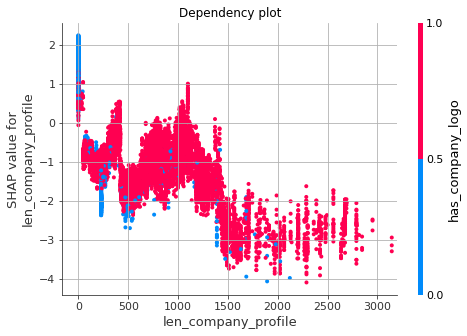

In [113]:
shap.dependence_plot(
    'len_company_profile', shap_values.values, features, interaction_index='has_company_logo',
    show=False, xmax=3200
)
plt.title('Dependency plot')
plt.grid()
plt.savefig('img/dependency.jpg')